### 1. 모듈 및 패키지 불러오기

In [1]:
# 1. 필요한 모듈을 모두 여기에 기술하세요(한번에)
# 2점
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. 데이터 불러오기

In [2]:
# 2. 데이터를 읽어 데이터프레임으로 저장하세요
# 2점
df = pd.read_csv('/content/drive/MyDrive/KDT/시험/kidiq.csv')
df

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


> **데이터 살펴보기**

|Column|Description|
|:---|:---|
|kid_score|아이의 시험 점수|
|mom_hs|엄마의 학력|
|mom_iq|엄마의 IQ|
|mom_work|엄마의 일하는 시간|
|mom_age|엄마의 나이|

### 3. 데이터셋 정보보기

In [3]:
# 3. info() 메소드를 사용하여 데이터를 살펴보고 해당 데이터의 특징을 간단하게 적어보세요(데이터가 적다, 결측지가 있다 ...)
# 2점
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


* 컬럼은 5개이고, 총 데이터의 수는 434개로 모델학습에 있어서 적은편이다.
* 컬럼들의 데이터타입은 float형과 int형으로 이루어져 있다.

### 4. 데이터프레임 행열 알아보기


In [4]:
# 4. 데이터프레임의 차원을 확인하세요(행열)
# 2점
df.shape     #  434행 5열

(434, 5)

### 5. 데이터셋 결측지 알아보기 & 삭제하기

In [5]:
# 5. 결측치 데이터가 있다면 모두 삭제하세요
# 단, 없어도 삭제 코드를 작성하고 실행하세요
# 2점
print(df.isna().sum())    # 결측지의 개수
df.dropna(inplace=True)   # NaN값 지우고 재저장

kid_score    0
mom_hs       0
mom_iq       0
mom_work     0
mom_age      0
dtype: int64


### 6. 데이터셋의 수치형 데이터 정보보기


In [6]:
# 6. describe() 메소드를 사용하여 데이터 통계정보를 확인하고 해당 데이터의 특징을 간단하게 적어보세요(맥스값이 얼마다,이상치로 판단되는 값이 있다, 수치형 데이터의 특징...)
# 2점
df.describe()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
count,434.000000,434.000000,434.000000,434.000000,434.000000
mean,86.797235,0.785714,100.000000,2.896313,22.785714
std,20.410688,0.410799,15.000000,1.181394,2.701070
min,20.000000,0.000000,71.037405,1.000000,17.000000
25%,74.000000,1.000000,88.660321,2.000000,21.000000
50%,90.000000,1.000000,97.915254,3.000000,23.000000
75%,102.000000,1.000000,110.272742,4.000000,25.000000
max,144.000000,1.000000,138.893106,4.000000,29.000000


* 아이의 IQ의 max값은 144이고 min값은 20, 평균은 약 86.8이다.
* 엄마의 학력은 min값은0, max값은 1, 평균은 약 0.786 이다.
* 엄마의 IQ는 평균 100이고, 최소값은 71.04, 최대값은 138.9 이다.
* 엄마가 일하는 시간의 최소값은 1이고, 최대값은 4이다.
* 엄마의 나이의 평균은 22.79세 이고, 최소 나이는 17세, 최대 나이는 29세 이다.

> 수치데이터에서 이상치로 판단되는 데이터는 없는 것 같음.

### 7. 파생변수 추가하기

In [7]:
# 7. 아래 내용을 확인하고 컬럼을 추가하세요.(파생변수 추가)
# mom_iq_c: 엄마의 전체 IQ평균에서 해당 데이터의 엄마의 IQ의 차를 구해 변수로 만드세요(평균 - 각 IQ)
# mom_age_c: 엄마의 전체 나이평균에서 해당 데이터의 엄마의 나이의 차를 구해 변수로 만드세요(평균 - 나이)
# 2점
df['mom_iq_c'] = df['mom_iq'].mean() - df['mom_iq']
df['mom_age_c'] = df['mom_age'].mean() - df['mom_age']

In [8]:
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,65,1,121.117529,4,27,-21.117529,-4.214286
1,98,1,89.361882,4,25,10.638118,-2.214286
2,85,1,115.443165,4,27,-15.443165,-4.214286
3,83,1,99.449639,3,25,0.550361,-2.214286
4,115,1,92.745710,4,27,7.254290,-4.214286


### 8. 히스토그램 알아보기

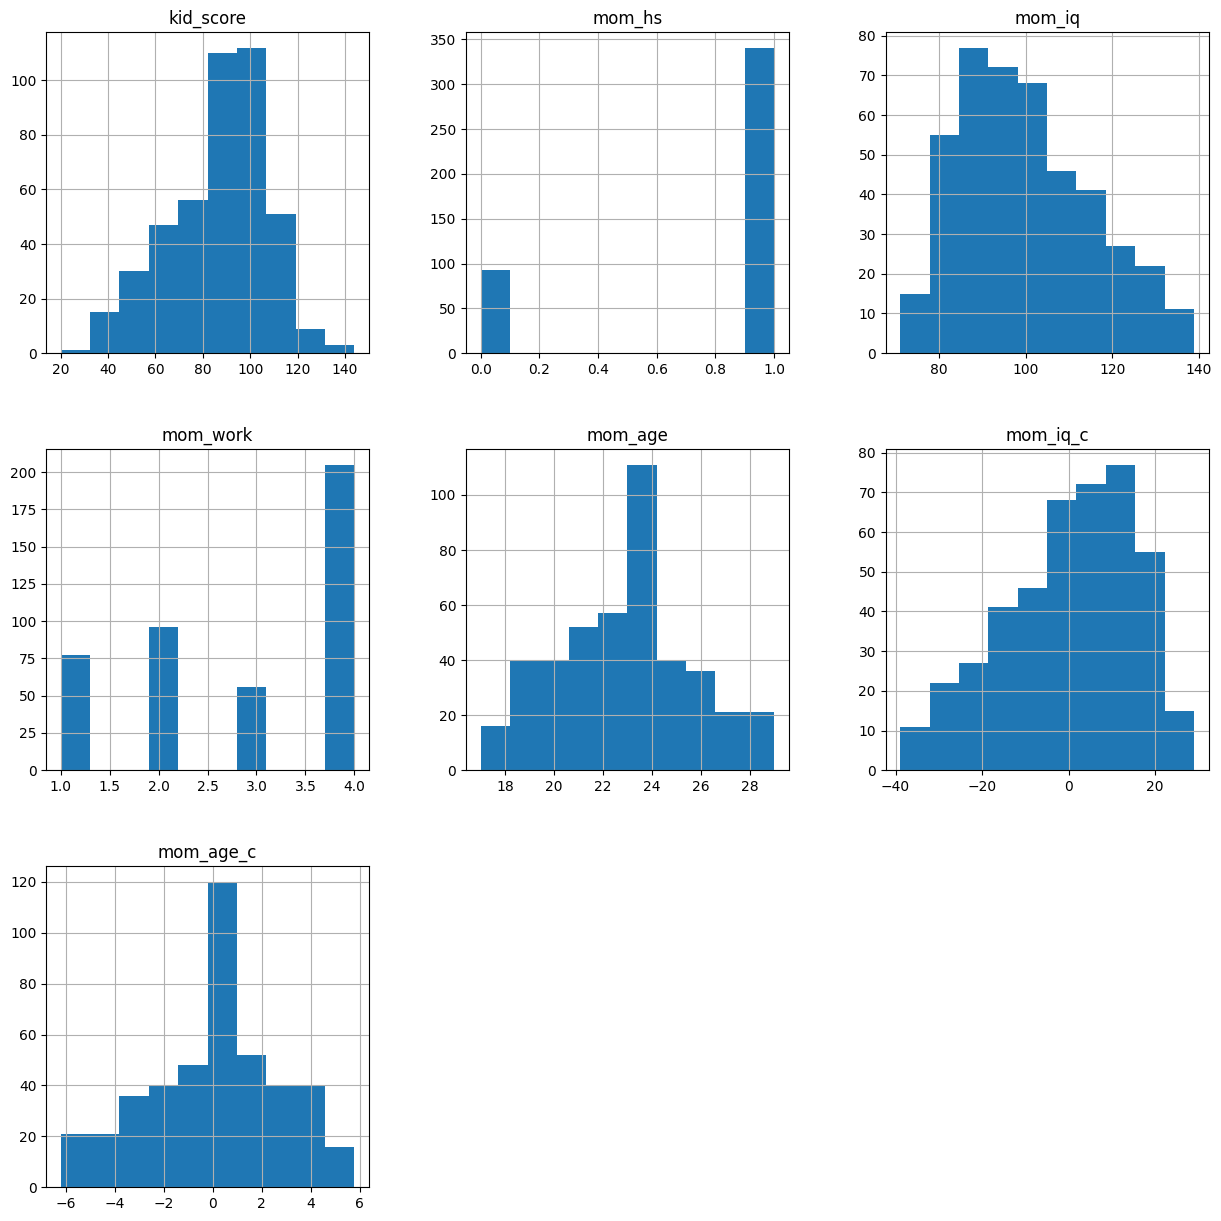

In [9]:
# 8. 모든 변수에 대해 hist 그래프를 만들고 각 그래프에 따라 insight를 간단히 적어보세요(옵션을 주지 않으면 각 필드별로 만들어짐)
# 2점
df.hist(figsize=(15,15))
plt.show()

* 모든 컬럼의 데이터에서 이상치가 확인되지 않는다.
* 아이의 IQ(점수)는 80 ~ 100 초반의 수가 가장 많다.
* 엄마의 학력은 0과 1로 이루어져 있고, 1의 데이터수가 더 많다.
* 엄마의 아이큐는 90 ~ 100초반인 데이터가 가장 많다.
* 엄마가 일하는 시간은 1시간, 2시간, 3시간, 4시간 4개의 데이터로 이루어져 있고 4시간 일하는 엄마의 데이터가 가장 많다.
* 엄마의 나이는 23살이 가장 많다.
* 평균 엄마의 아이큐에서 엄마의 아이큐를 뺀 컬럼의 히스토그램과 엄마의 아이큐 히스토그램이 대칭 양상을 보인다.
* 평균 엄마의 나이에서 엄마의 나이를 뺀 컬럼의 히스토램과 엄마의 나이 히스토그램이 대칭 양상을 보인다.

> 엄마의 아이큐와 엄마의 나이는 평균값 주변에 분포되어 있음을 알 수 있다.

> 엄마의 아이큐와 엄마의 나이의 평균값은 데이터의 중앙값(50%)과 비슷하다.

In [10]:
df['mom_iq'].mean()

99.99999999999999

In [11]:
df['mom_iq'].median()

97.9152543291671

In [12]:
df['mom_age'].mean()

22.785714285714285

In [13]:
df['mom_age'].median()

23.0

### 9. 독립변수 선언하기

In [14]:
# 9. 독립변수들을 변수 X에 저장하세요
# 2점
X = df.drop('kid_score',axis=1)
X

,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,1,121.117529,4,27,-21.117529,-4.214286
1,1,89.361882,4,25,10.638118,-2.214286
2,1,115.443165,4,27,-15.443165,-4.214286
3,1,99.449639,3,25,0.550361,-2.214286
4,1,92.745710,4,27,7.254290,-4.214286
...,...,...,...,...,...,...
429,0,84.877412,4,21,15.122588,1.785714
430,1,92.990392,4,23,7.009608,-0.214286
431,0,94.859708,2,24,5.140292,-1.214286
432,1,96.856624,2,21,3.143376,1.785714


### 10. 종속변수 선언하기

In [15]:
# 10. 종속변수를 y에 저장하세요
# 2점
y = df['kid_score']
y

0       65
1       98
2       85
3       83
4      115
      ... 
429     94
430     76
431     50
432     88
433     70
Name: kid_score, Length: 434, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [17]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(347, 6) (87, 6)
(347,) (87,)


### 11. 모델 학습시키기

In [18]:
# 11. LinearRegression에 대해 간단히 설명하고 독립변수와 종속변수를 넣고 학습하세요(모델에 대한 간단한 설명)
# 3점
# 모델 객체 생성
lr = LinearRegression()

### LinearRegression(선형회귀)
* 데이터를 통해 가장 잘 설명할 수 있는 직선으로 데이터를 분석하는 방법
* 독립변수들의 선형 조합으로 종속변수를 예측
* y = W1x1 + W2x2 ... + b
* W(가중치): 종속변수의 예측에 얼마나 영향을 미치는지(기울기)
* b(절편): 회귀 직선에서 y축과 교차하는 지점


In [19]:
# 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# 예측값
pred = lr.predict(X_test)
pred

array([100.84407268,  89.8546979 ,  85.55454063,  89.67554692,
        88.35104454,  78.95265896,  97.32274613,  84.68093722,
        67.04810651,  82.78235712,  96.84691457,  87.36848762,
        82.19055209,  87.78210551,  82.7848324 ,  89.31766181,
        80.22451495, 102.24821218, 110.24861338,  82.69699566,
        91.13767989,  79.56139111,  89.59018546,  73.16018537,
        85.29556411,  71.31902111,  73.82926926,  87.78210551,
        80.29248014,  89.68921232,  87.29431633,  82.938198  ,
        82.62260849,  98.80182571,  70.69622529,  87.68196065,
        85.24802498,  90.6638408 ,  83.1015671 ,  86.57535453,
        86.08100025,  80.44821112,  95.00514848,  83.70094695,
        84.6209443 ,  83.96305053,  87.60551511, 109.03193551,
        87.07697846,  99.55874634, 101.39238295,  70.10358695,
        95.6301705 ,  86.70845018, 106.16885461,  81.0476291 ,
        80.13661408,  87.24762999,  70.14799902,  69.31176943,
        89.39533893,  90.42190967,  89.27097547,  82.88

### 12. 선형회귀 모델의 가중치, 절편, RMSE 값 구하기

In [21]:
# 12. 위 학습된 모델의 W, b, RMSE를 구하세요
# 3점

# W(기울기)
lr.coef_

array([ 6.48393523,  0.28381737,  0.31119878,  0.04896391, -0.28381737,
       -0.04896391])

In [22]:
# b(절편)
lr.intercept_

51.218188640049654

In [23]:
# RMSE
RMSE_1 = mean_squared_error(pred, y_test, squared=False)
print(RMSE_1)

18.044474835369815


### 13. RandomizedSearchCV를 통해 최적의 하이퍼 파라미터 구하기
* [LinearRegression 모델의 파라미터들](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [24]:
# 13. RandomizedSearchCV를 통해 최적의 하이퍼 파라미터를 찾아 W, b, RMSE를 구하세요
# 3점
params = {
    'fit_intercept': [True, False],   # y절편(b) 사용여부(기본값 True)
    'copy_X': [True, False],          # 입력데이터의 복사 여부(기본값은 True)
    # 'n_jobs': [-1, 1],
    'n_jobs': [None, -1, 1, 2, 4],    # 사용할 작업수(기본값 None-1개의cpu 사용)
    'positive': [True, False]       # coefficient가 양소가 되도록하는지(기본값 False)
}

In [25]:
rand_lr = RandomizedSearchCV(lr, params, n_iter=20, random_state=10)

In [26]:
rand_lr.fit(X_train, y_train)

RandomizedSearchCV(estimator=LinearRegression(), n_iter=20,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, -1, 1, 2, 4],
                                        'positive': [True, False]},
                   random_state=10)

In [27]:
# randomizedse
rand_lr.cv_results_

{'mean_fit_time': array([0.00934687, 0.00423422, 0.00407648, 0.00445881, 0.00430889,
        0.00446868, 0.00948405, 0.00812731, 0.00644431, 0.00787721,
        0.0051219 , 0.00539918, 0.00420289, 0.00411668, 0.00419617,
        0.00423446, 0.00427661, 0.01414776, 0.00543914, 0.01356778]),
 'std_fit_time': array([6.33154735e-03, 7.12659575e-05, 1.87125021e-04, 7.89640788e-04,
        3.38034681e-04, 3.47978169e-04, 3.75846827e-03, 5.58662839e-03,
        2.13503400e-03, 7.41898454e-03, 1.83013539e-03, 3.06202665e-03,
        1.83965691e-04, 2.72448354e-04, 7.69418726e-04, 9.49852900e-04,
        5.90225244e-04, 4.94365010e-03, 1.90219315e-03, 9.95683564e-03]),
 'mean_score_time': array([0.0027277 , 0.0025918 , 0.00254612, 0.00377035, 0.00281048,
        0.00267901, 0.00500736, 0.00724277, 0.00830975, 0.00411501,
        0.00236397, 0.00254712, 0.00401068, 0.00459828, 0.00298185,
        0.00233107, 0.00238032, 0.00721107, 0.00825887, 0.00490947]),
 'std_score_time': array([2.44943613e-

In [28]:
rand_lr.best_params_

{'positive': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}

In [29]:
rand_lr.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(estimator=LinearRegression(), n_iter=20,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, -1, 1, 2, 4],
                                        'positive': [True, False]},
                   random_state=10)>

In [30]:
# {{'positive': True, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
lr_best = LinearRegression(positive=True, n_jobs=-1, fit_intercept=True, copy_X= True)

In [31]:
lr_best.fit(X_train,y_train)

LinearRegression(n_jobs=-1, positive=True)

In [32]:
pred2 = lr_best.predict(X_test)
pred2

array([100.84407268,  89.8546979 ,  85.55454063,  89.67554692,
        88.35104454,  78.95265896,  97.32274613,  84.68093722,
        67.04810651,  82.78235712,  96.84691457,  87.36848762,
        82.19055209,  87.78210551,  82.7848324 ,  89.31766181,
        80.22451495, 102.24821218, 110.24861338,  82.69699566,
        91.13767989,  79.56139111,  89.59018546,  73.16018537,
        85.29556411,  71.31902111,  73.82926926,  87.78210551,
        80.29248014,  89.68921232,  87.29431633,  82.938198  ,
        82.62260849,  98.80182571,  70.69622529,  87.68196065,
        85.24802498,  90.6638408 ,  83.1015671 ,  86.57535453,
        86.08100025,  80.44821112,  95.00514848,  83.70094695,
        84.6209443 ,  83.96305053,  87.60551511, 109.03193551,
        87.07697846,  99.55874634, 101.39238295,  70.10358695,
        95.6301705 ,  86.70845018, 106.16885461,  81.0476291 ,
        80.13661408,  87.24762999,  70.14799902,  69.31176943,
        89.39533893,  90.42190967,  89.27097547,  82.88

In [33]:
lr_best.coef_

array([6.48393523, 0.56763475, 0.31119878, 0.09792782, 0.        ,
       0.        ])

In [34]:
lr_best.intercept_

21.720773719226642

In [35]:
RMSE_2 = mean_squared_error(pred2, y_test, squared=False)
print(RMSE_2)

18.044474835369815


In [36]:
RMSE_1 - RMSE_2

0.0

### 14. K-Fold를 통하여 교차검증하기

In [37]:
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c
0,65,1,121.117529,4,27,-21.117529,-4.214286
1,98,1,89.361882,4,25,10.638118,-2.214286
2,85,1,115.443165,4,27,-15.443165,-4.214286
3,83,1,99.449639,3,25,0.550361,-2.214286
4,115,1,92.745710,4,27,7.254290,-4.214286


In [38]:
# 14. 위 결과의 w, b를 이용해 K-Fold(k=5)를 이용하여 RMSE의 평균 값을 확인하세요
# 3점
Kf = KFold(n_splits = 5, random_state=15, shuffle=True)
Kf

KFold(n_splits=5, random_state=15, shuffle=True)

In [39]:
for train_index, test_index in Kf.split(range(len(df))):    # df의 K-fold 개수(5개)만큼 돌면서 train_index와 test_index를 split하기
  print(train_index, test_index)
  print(len(train_index), len(test_index))  # 데이터가 섞여서 나누어짐

[  0   1   3   5   7   8   9  10  11  12  14  15  16  17  19  20  22  23
  26  27  28  29  30  31  32  34  36  37  38  39  41  42  43  45  46  47
  48  49  50  51  52  53  56  57  58  59  60  61  62  63  66  68  70  71
  72  74  75  76  77  78  79  80  81  82  84  85  86  87  88  89  90  91
  92  93  94  95  96  98  99 100 101 102 104 107 108 109 112 113 114 115
 116 117 118 119 120 121 122 123 127 128 129 130 132 133 134 136 137 138
 140 141 143 144 145 146 147 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 168 169 171 173 174 176 177 178 179 180
 182 183 184 186 188 190 192 193 194 195 196 198 199 201 202 203 204 205
 206 207 208 210 211 212 213 214 215 216 217 218 219 221 222 223 224 226
 227 228 229 230 231 232 234 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 252 253 254 256 258 259 260 261 262 263 264 265 266 267 268
 271 272 273 274 275 276 277 278 279 280 281 283 284 286 288 289 291 293
 294 295 296 299 300 303 305 306 307 308 309 310 31

In [40]:
RMSE_list = []

for train_index, test_index in Kf.split(range(len(df))):
  X = df.drop('kid_score', axis=1)
  y = df['kid_score']

  # K겹으로 나눈 데이터셋을 학습데이터와 test 데이터로 나누어줌
  X_train = X.iloc[train_index]
  X_test = X.iloc[test_index]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

  # 학습
  lr = LinearRegression(positive=True, n_jobs=None, fit_intercept=True, copy_X= True)
  lr.fit(X_train, y_train)
  # 예측(W, b를 이용)
  y_pred = np.dot(X_test, lr.coef_) + lr.intercept_
  # 예측값에 대힌 RMSE를 계산하고 RMSE_list에 담음
  RMSE_list.append(mean_squared_error(y_pred, y_test, squared=False) )

In [41]:
KF_RMSE_1 = np.mean(RMSE_list)
print(KF_RMSE_1)

18.213297684181963


### 15. 독립변수를 추가하고 K-Fold로 교차검증하기

In [42]:
# 15. 독립변수에 가중치(mom_hs * mem_iq_c) 변수를 추가하고 14번에 대해 다시 확인하세요
# 어머니의 학력과 IQ의 평균에서의 차이값을 곱함
# 필드가 하나 추가되고 모델에 다시 학습
# 3점
df['mom_weight'] = df['mom_hs'] * df['mom_iq_c']

In [43]:
df.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c,mom_weight
0,65,1,121.117529,4,27,-21.117529,-4.214286,-21.117529
1,98,1,89.361882,4,25,10.638118,-2.214286,10.638118
2,85,1,115.443165,4,27,-15.443165,-4.214286,-15.443165
3,83,1,99.449639,3,25,0.550361,-2.214286,0.550361
4,115,1,92.745710,4,27,7.254290,-4.214286,7.254290


In [44]:
Kf = KFold(n_splits = 5, random_state=10, shuffle=True)
Kf

KFold(n_splits=5, random_state=10, shuffle=True)

In [45]:
RMSE_list = []

for train_index, test_index in Kf.split(range(len(df))):
  X = df.drop('kid_score', axis=1)
  y = df['kid_score']

  # K겹으로 나눈 데이터셋을 학습데이터와 test 데이터로 나누어줌
  X_train = X.iloc[train_index]
  X_test = X.iloc[test_index]
  y_train = y.iloc[train_index]
  y_test = y.iloc[test_index]

  # 학습
  lr = LinearRegression(positive=True, n_jobs=None, fit_intercept=True, copy_X= True)
  lr.fit(X_train, y_train)
  # 예측
  y_pred = lr.predict(X_test)
  # 예측값에 대힌 RMSE를 계산하고 RMSE_list에 담음
  RMSE_list.append(mean_squared_error(y_pred, y_test, squared=False) )

In [46]:
KF_RMSE_2 = np.mean(RMSE_list)
print(KF_RMSE_2)

18.20601904498228


### 16. 결과 비교하기

In [47]:
print(f'KF_RMSE_1: {KF_RMSE_1}, KF_RMSE_2: {KF_RMSE_2}')

KF_RMSE_1: 18.213297684181963, KF_RMSE_2: 18.20601904498228


In [48]:
# 16. 14번, 15번에 대해 결과를 비교하고 다른 결과에 대해 설명하세요
# 5점
KF_RMSE_1 - KF_RMSE_2

0.007278639199682857

* 14번
  * RMSE: 18.319261953764585
* 15번(독립변수 추가)
  * RMSE: 18.20601904498228
* RMSE 차이: 0.11324290878230414
* 모델 성능 향상


> 아이의 아이큐에 유의미한 영향이 있음(mom_hs * mom_iq_c)

### 17. 테스트 데이터로 모델 확인하기

In [49]:
# 17. 테스트 데이터를 작성하여 모델에 데이터를 넣어보세요
# 10점
temp_X= [[1, 105.882, 2, 29, -5.882, 1.785, -5.882],
         [0, 125.231, 3, 26, 4.769, -1.214, 4.769],
         [1, 95, 4, 28, -9.437, 0.785, -9.437]]
temp_y = lr.predict(temp_X)
print(temp_y)  # 엄마의 IQ가 높을수록 아이의 IQ도 높은 값으로 예측

[ 91.49813474 115.0914795   78.45037906]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 18. 결과 시각화하기

In [50]:
X_test

,mom_hs,mom_iq,mom_work,mom_age,mom_iq_c,mom_age_c,mom_weight
4,1,92.745710,4,27,7.254290,-4.214286,7.254290
8,1,81.619526,1,24,18.380474,-1.214286,18.380474
11,1,94.859708,4,24,5.140292,-1.214286,5.140292
13,1,114.114297,4,26,-14.114297,-3.214286,-14.114297
15,1,120.419146,1,26,-20.419146,-3.214286,-20.419146
...,...,...,...,...,...,...,...
417,0,90.248262,1,18,9.751738,4.785714,0.000000
425,1,127.675717,4,29,-27.675717,-6.214286,-27.675717
427,0,80.464018,4,21,19.535982,1.785714,0.000000
429,0,84.877412,4,21,15.122588,1.785714,0.000000


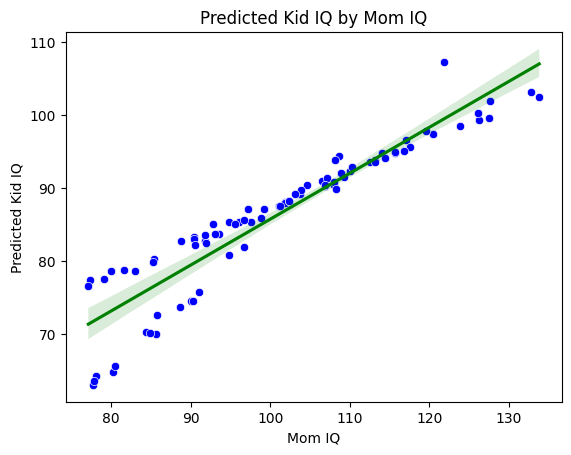

In [51]:
# 18. 위 결과에 대해 설명하고, 결론(부모의 IQ와 아이의 IQ는 연관이 있을까?)에 대해 결과를 시각적으로 표현하세요
# 10점
sns.scatterplot(x=X_test['mom_iq'], y=y_pred, color='blue')
sns.regplot(x=X_test['mom_iq'], y=y_pred, scatter=False, color='green')  # 선형 회귀 그래프 선
plt.xlabel('Mom IQ')
plt.ylabel('Predicted Kid IQ')
plt.title('Predicted Kid IQ by Mom IQ')
plt.show()

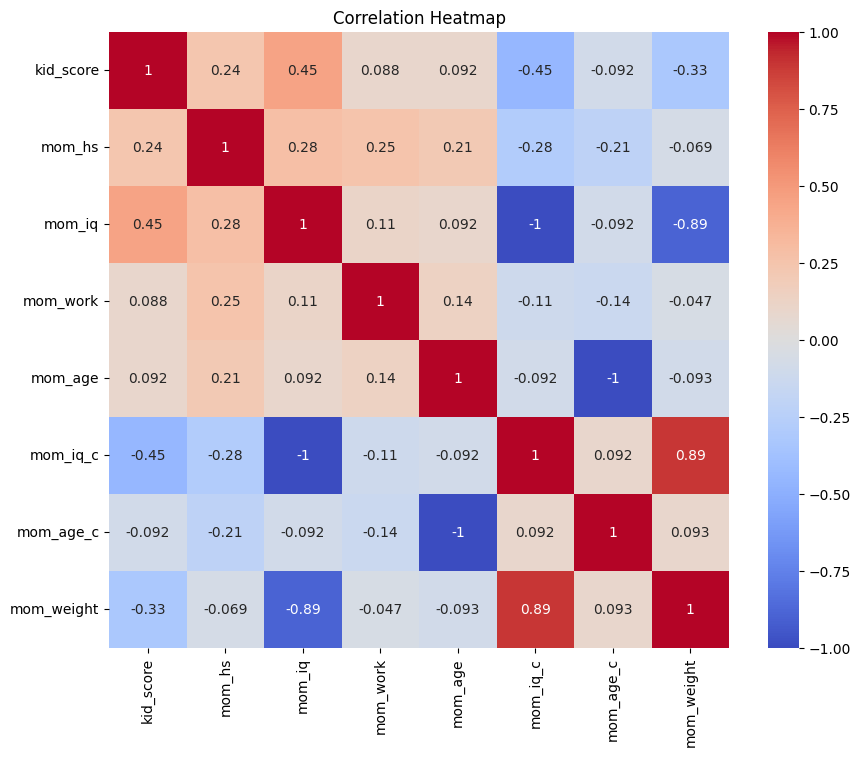

In [52]:
# 엄마의 아이큐와 아이의 아이큐는 선형관계라고 할 수 있음.
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

> 아이의 IQ에 엄마의 IQ와 엄마의 학력이 유의미한 상관관계가 있다고 판단(선형)

In [53]:
# 19. Cross validation은 어떨 때 유의미하게 사용할 수 있는지 설명하세요
# 10점

###  19. Cross validation(교차검증)
* train_test_split 에서 발생하는 데이터의 섞임이 한쪽으로 치우친 경우

> KFold는 데이터를 동일한 크기의 여러 개의 Fold로 나누는 방식으로 분할하기 때문에 비슷한 크기와 분포를 가지게됨. 데이터의 불균형으로 인한 모델 과적합 문제를 완화할 수 있음


* 데이터의 수가 적은 경우: 규모가 작은 데이터셋으로 모델을 학습시킬 시 성능을 신뢰할 수 없음

>  제한된 데이터셋에서 K개의 섞여있는 데이터셋으로 검증하게 되면 모델의 성능을 더 잘 예측할 수 있음.


* 과적합(overfitting): 과적합된 모델은 학습데이터에 대해서는 좋은 결과를 보일 수 있으나 새로운 데이터에서 예측 신뢰도가 떨어짐

> 데이터와 별도의 검증 데이터를 사용하여 모델의 성능을 평가하기 때문에, 모델이 어떻게 동작할지를 더 잘 예측할 수 있음

```
과적합을 피하면서 파라미터를 튜닝하고 일반적인 모델을 만들고 더 신뢰성 있는 모델 평가를 진행하기 위해서 교차검증 진행
```



In [54]:
# 20. Cross validation 결과에서 특정 Fold에만 결과가 잘 나오는 경우 어떻게 처리해야 하는지 설명하세요
# 10점

### 20. KFold에서 특정 Fold에서만 결과가 잘 나오는 이유
* K개의 구간으로 데이터가 순차적으로 나누어졌을 때 특정 구간에서의 데이터만 학습데이터로 학습되었을 경우 예측 결과가 과적합되어 잘 나올 수 있다.
* 새로운 데이터의 구간에서는 모델의 예측 신뢰도가 떨어질 수 있다.

> 데이터의 균형을 위해 shuffle=True, random_state=10 과 같은 옵션을 통해 데이터를 섞은 후 k개의 fold로 split 후 모델에 적용